# Zomato Project


## Importing Library and reading data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
restaurants=pd.read_csv('zomato.csv',encoding = "ISO-8859-1")
countrycode=pd.read_excel('Country-Code.xlsx')

In [3]:
restaurants.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [15]:
restaurants.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [16]:
restaurants.rename(columns={'Restaurant ID':'Restaurant_ID', 'Restaurant Name':'Restaurant_Name', 'Country Code':'Country_Code', 'Locality Verbose':'Locality_Verbose',
       'Average Cost for two':'Average_Cost_for_two', 'Has Table booking':'Has_Table_booking','Has Online delivery':'Has_Online_delivery', 'Is delivering now':'Is_delivering_now', 'Switch to order menu':'Switch_to_order_menu','Price range':'Price_range', 'Aggregate rating':'Aggregate_rating', 'Rating color':'Rating_color', 'Rating text':'Rating_text'},
                  inplace=True)

In [18]:
restaurants.shape

(9551, 21)

In [6]:
countrycode

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [21]:
countrycode.rename(columns={"Country Code":"Country_Code"}, inplace= True)

In [22]:
countrycode.columns

Index(['Country_Code', 'Country'], dtype='object')

In [13]:
restaurants["Average_Cost_for_two"][restaurants["Average_Cost_for_two"]==0]

84      0
85      0
87      0
201     0
240     0
277     0
346     0
397     0
407     0
634     0
637     0
639     0
677     0
851     0
2364    0
2368    0
9242    0
9254    0
Name: Average Cost for two, dtype: int64

## Data Cleaning

The average cost for two column has some 0 values which is improper. Lets try removing those datas


In [24]:
restaurants['Average_Cost_for_two']=restaurants['Average_Cost_for_two'].replace(0,np.nan)

In [28]:
restaurants.isnull().sum()

Restaurant_ID            0
Restaurant_Name          0
Country_Code             0
City                     0
Address                  0
Locality                 0
Locality_Verbose         0
Longitude                0
Latitude                 0
Cuisines                 9
Average_Cost_for_two    18
Currency                 0
Has_Table_booking        0
Has_Online_delivery      0
Is_delivering_now        0
Switch_to_order_menu     0
Price_range              0
Aggregate_rating         0
Rating_color             0
Rating_text              0
Votes                    0
dtype: int64

In [29]:
restaurants.dropna(inplace=True)

## Merging the country sheet and zomato file to get the country code

In [31]:
restaurants=restaurants.merge(countrycode,on='Country_Code')

In [32]:
restaurants.head()

Restaurant_ID         Restaurant_Name  Country_Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality_Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has_Table_booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has_Online_delivery Is_delivering_now Switch_to_order_menu Price_range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate_rating  Rating_color  Rating_text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

In [35]:
 restaurants.Country.value_counts()

India             8643
United States      419
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

### Lets list all the country now and do analysis

In [36]:
indiaRes=restaurants[restaurants['Country']=='India']
singaporeRes=restaurants[restaurants['Country']=='Singapore']
AusRes=restaurants[restaurants['Country']=='Australia']
BrazRes=restaurants[restaurants['Country']=='Brazil']
CanadaRes=restaurants[restaurants['Country']=='Canada']
UAERes=restaurants[restaurants['Country']=='UAE']
UKRes=restaurants[restaurants['Country']=='United Kingdom']
USRes=restaurants[restaurants['Country']=='United States']
SouthAfricaRes=restaurants[restaurants['Country']=='South Africa']
NewZelandRes=restaurants[restaurants['Country']=='New Zealand']
TurkeyRes=restaurants[restaurants['Country']=='Turkey']
IndonesiaRes=restaurants[restaurants['Country']=='Indonesia']
QatarRes=restaurants[restaurants['Country']=='Qatar']
SrilankaRes=restaurants[restaurants['Country']=='Sri Lanka']

## 2) Get the Top rated restaurants in each city in India

In [14]:
indiaRes.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
609        3400025                             Jahanpanah             1  Agra   
610        3400341                    Rangrezz Restaurant             1  Agra   
611        3400005                Time2Eat - Mama Chicken             1  Agra   
612        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
613        3400017                         Pinch Of Spice             1  Agra   

                                               Address     Locality  \
609  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
610  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
611        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
612  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
613  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

      Locality Verbose  Longitude   Latitude                        Cuisines  \
609   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
610   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
611   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
612  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
613  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

     ...  Has Table booking Has Online delivery Is delivering now  \
609  ...                 No                  No                No   
610  ...                 No                  No                No   
611  ...                 No                  No                No   
612  ...                 No                  No                No   
613  ...                 No                  No                No   

    Switch to order menu Price range Aggregate rating  Rating color  \
609                   No           3              3.9        Yellow   
610                   No           2              3.5        Yellow   
611                   No           2              3.6        Yellow   
612                   No           2              4.0         Green   
613                   No           3              4.2         Green   

     Rating text Votes Country  
609         Good   140   India  
610         Good    71   India  
611         Good    94   India  
612    Very Good    87   India  
613    Very Good   177   India  

[5 rows x 22 columns]

##### - Get the cities in india

In [37]:
indiaRes.City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Goa               20
Surat             20
Ludhiana          20
Kochi             20
Vadodara          20
Aurangabad        20
Jaipur            20
Mangalore         20
Coimbatore        20
Chennai           20
Nashik            20
Bangalore         20
Pune              20
Mysore            20
Patna             20
Vizag             20
Kolkata           20
Ranchi            20
Nagpur            20
Puducherry        20
Bhopal            20
Indore            20
Mumbai            20
Allahabad         19
Dehradun          19
Chandigarh        18
Hyderabad         18
Kanpur            18
Varanasi          18
Agra              17
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

### Top restaurant in delhi based on the rating and vote count

In [42]:
DelhiTopRes=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate_rating']>4.5)][['Aggregate_rating','Restaurant_Name','Votes']].sort_values(ascending=False,by='Votes')

In [43]:
DelhiTopRes

Aggregate_rating            Restaurant_Name  Votes
2991               4.9         Naturals Ice Cream   2620
3579               4.9  Indian Accent - The Manor   1934
6637               4.6   The California Boulevard   1691
4617               4.6                  Big Chill   1569
6975               4.7        Echoes Satyaniketan   1563
7827               4.6            Cafeteria & Co.   1136
3288               4.6              Spezia Bistro   1071
6635               4.7         Naturals Ice Cream    474
4276               4.9             Masala Library    408
3710               4.6                     Tashan    304
7045               4.7                   Pa Pa Ya    268
2992               4.7   Zabardast Indian Kitchen    242
6633               4.6         Band Baaja Baaraat    128
7158               4.6                Greenr Cafe    112
6634               4.8               Kopper Kadai     83
6404               4.6                Food Scouts     61
2990               4.7                MOB Brewpub     52

In [45]:
DelhiTopRes.style.apply(lambda x: ['background: green' if x.name == 'Votes' else 'background: lightsteelblue' for i in x])

## Finding out relationship between the rating and votes

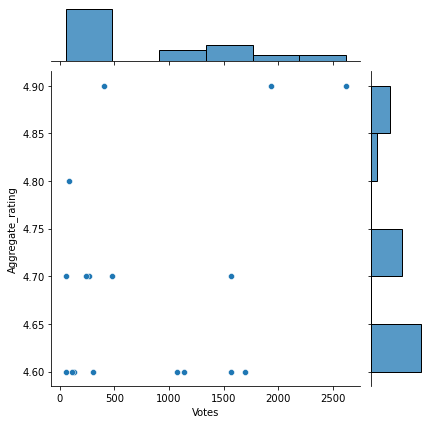

In [47]:
sns.jointplot('Votes','Aggregate_rating',data=DelhiTopRes)

There is a bit linear relationship between rating and the votes although not much, voting influences the rating

## Number of Restaurants in India

In [48]:
India=indiaRes['Restaurant_Name'].nunique()
India



6595

## Top 5 restaurants with online delivery in New Delhi

In [50]:
DelhiTopResOnline=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate_rating']>4.5) &(indiaRes['Has_Online_delivery']=='Yes')][['Aggregate_rating','Restaurant_Name','Votes','Has_Online_delivery']].sort_values(ascending=False,by='Votes')

In [52]:
DelhiTopResOnline.style.apply(lambda x: ['background: green' if x.name == 'Has_Online_delivery' else 'background: Royalblue' for i in x])

## Cheap but best restaurants available in a city

**Lets check which country is providing most online delivery option** 

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Country', ylabel='count'>

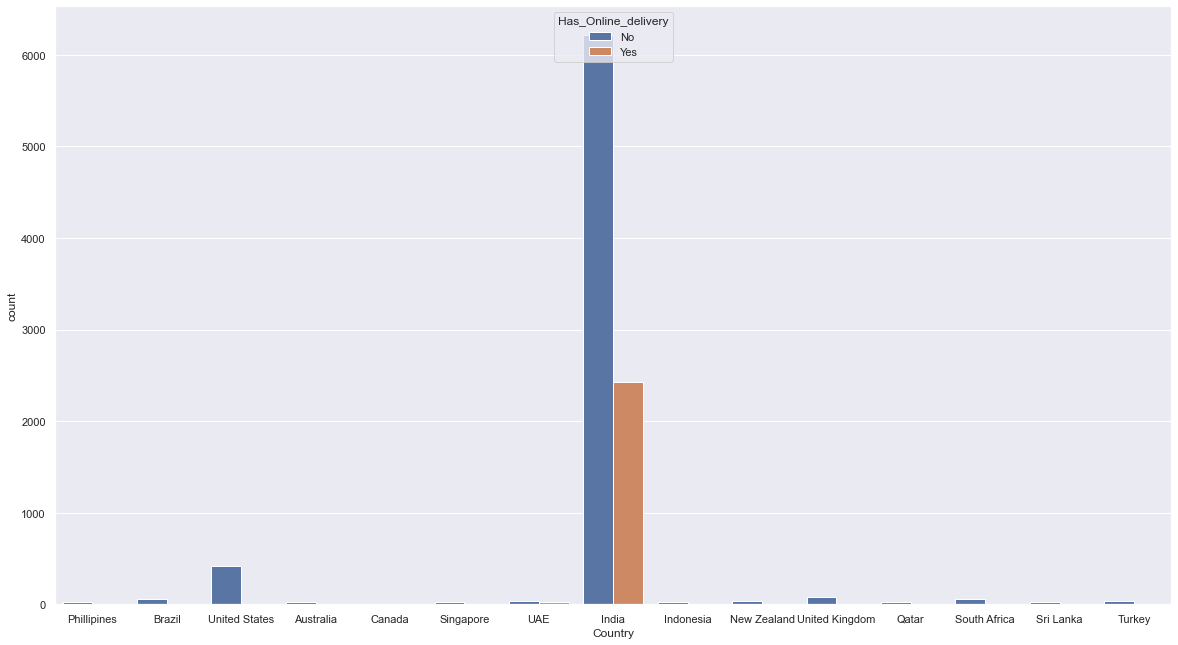

In [55]:
sns.set(rc={'figure.figsize':(20,11)})
sns.countplot(restaurants['Country'],hue=restaurants['Has_Online_delivery'])

**Look for the cheap but best restaurants available in a New Delhi**

In [60]:
New_Delhi=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate_rating']>4.5)&(indiaRes['Votes']>500)][['Average_Cost_for_two','Restaurant_Name','Aggregate_rating','Votes']].sort_values(ascending=True,by=['Average_Cost_for_two']).head()

In [61]:
New_Delhi

Average_Cost_for_two      Restaurant_Name  Aggregate_rating  Votes
2991                 150.0   Naturals Ice Cream               4.9   2620
6975                 600.0  Echoes Satyaniketan               4.7   1563
3288                 900.0        Spezia Bistro               4.6   1071
7827                 900.0      Cafeteria & Co.               4.6   1136
4617                1500.0            Big Chill               4.6   1569

## Top cuisines in each region.

In [63]:
IndianCuisines=restaurants[restaurants['Country']=='India']['Cuisines'].value_counts().head()
IndianCuisines

North Indian             936
North Indian, Chinese    511
Fast Food                348
Chinese                  340
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

## Aggregate rating of all the restaurants in each city in India

In [73]:
table=pd.pivot_table(data=indiaRes, index = ('City'), values="Aggregate_rating")

In [74]:
cm = sns.light_palette("green", as_cmap=True)
table.style.background_gradient(cmap=cm,axis=0)

Calculating the restaurants rating based on the rating text with percentage

In [77]:
indiaRes["Rating_text"].value_counts()

Average      3677
Not rated    2139
Good         1841
Very Good     691
Poor          180
Excellent     115
Name: Rating_text, dtype: int64

## Does rating influences the cost of restaurant?

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Rating_text', ylabel='Average_Cost_for_two'>

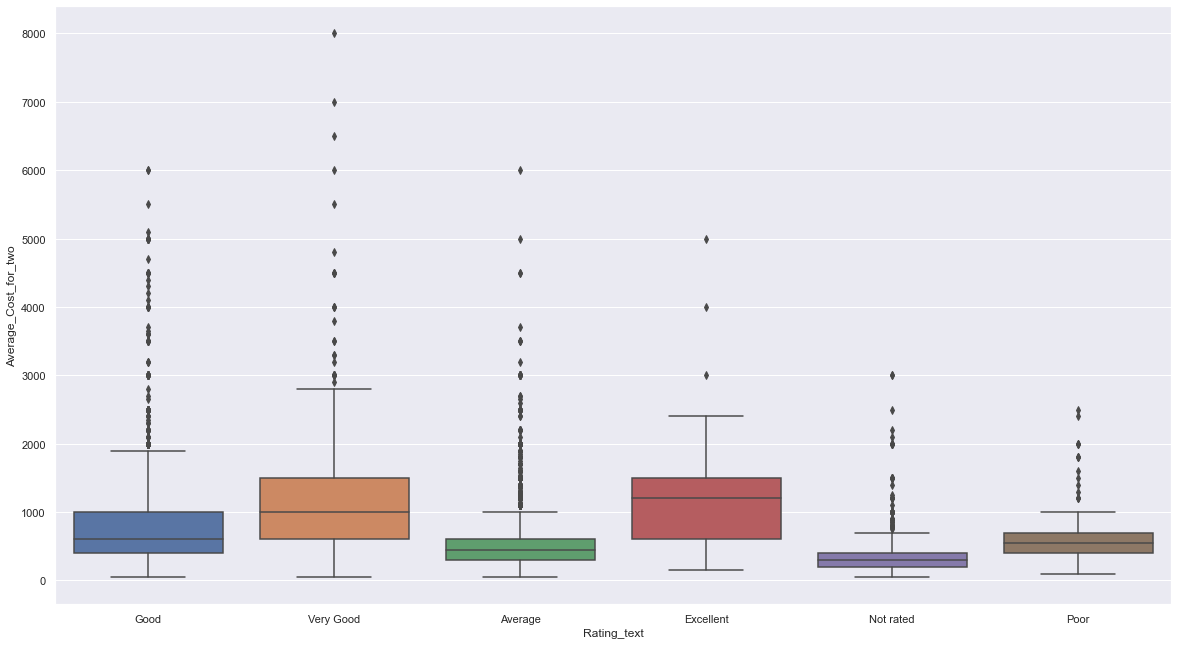

In [84]:
sns.boxplot(indiaRes["Rating_text"],indiaRes["Average_Cost_for_two"])

**The plot shows rating does influence the cost of a restaurant**

## Top Percentage cover of restaurants in a city.

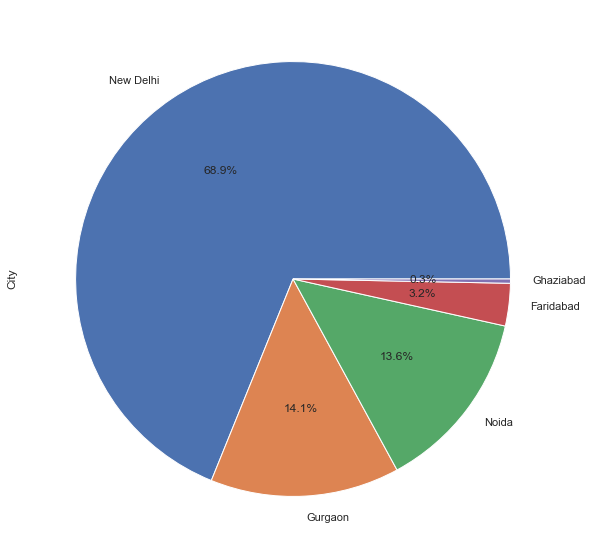

In [44]:
plt.figure(figsize=(10,10))
indiaRes['City'].value_counts().head().plot(kind='pie',autopct='%1.1f%%')

## Top cuisines in Indian restaurants.

<AxesSubplot:ylabel='Cuisines'>

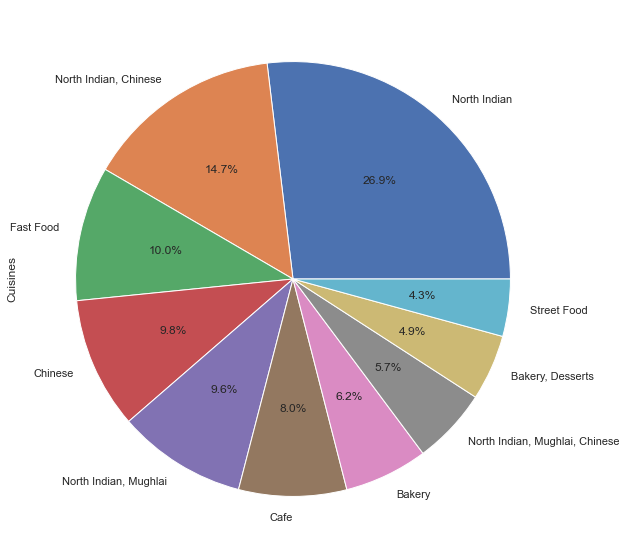

In [86]:
plt.figure(figsize=(10,10))
indiaRes['Cuisines'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

In [87]:
import pandas_profiling as pp

In [88]:
pp.ProfileReport(indiaRes)